# ANN Model on Weather Data

# 1. Import Libraries & Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score
)

In [2]:
# Set path to dataset
path = '/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/02 Data/Prepared Data/'

In [3]:
# Import Scaled Weather Data
df_weather = pd.read_csv(os.path.join(path, "Dataset-scaled.csv"))

In [4]:
# Check import
df_weather.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [5]:
# Import Pleasant Weather Answer Key
df_answer = pd.read_csv(os.path.join(path, "Dataset-Weather_Prediction_Pleasant_Weather.csv"))

In [6]:
# Check import
df_answer.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print("Weather data shape:", df_weather.shape)
print("Answers data shape:", df_answer.shape)

Weather data shape: (22950, 171)
Answers data shape: (22950, 16)


# 2. Data Prep

In [8]:
columns = df_weather.columns.tolist()

In [9]:
len(columns)

171

In [10]:
# Drop columns of 3 stations without labels
to_remove = ['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
              'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
            'TOURS_temp_max']

In [11]:
for col in to_remove:
    columns.remove(col)

In [12]:
len(columns)

150

In [13]:
df = df_weather[columns].copy()

In [14]:
df.shape

(22950, 150)

In [15]:
df.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


#### 20 columns have been removed.

# 3. Data Spliting and Scaling

## Split the data

In [16]:
# Further column cleaning to prepare for X & y
X = df.drop(columns=['DATE', 'MONTH'])
y = df_answer.drop(columns=['DATE'])

In [17]:
# Check output
print(X.shape)
print(y.shape)

(22950, 148)
(22950, 15)


In [18]:
# Training & Testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [19]:
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (17212, 148) (17212, 15)
Test shapes: (5738, 148) (5738, 15)


## Scale the data

In [20]:
# Scale & fit data 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [21]:
# Convert back to DataFrames to preserve column names
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_df  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)

In [22]:
# Check output
X_train_df.head()

,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,-0.492096,-1.411077,-0.030950,-0.616603,-0.746131,1.181615,-0.321907,-0.178396,0.530475,1.352627,...,0.169208,0.059797,-0.566890,-0.008427,-0.146880,-0.024111,-0.411551,1.454750,1.575817,1.165121
20472,1.360492,1.081862,-0.587893,0.557788,-0.214102,-0.827240,-0.262136,-0.178396,-1.069706,-1.652545,...,-0.443416,-0.080424,-0.007306,-1.066874,-0.003704,-0.024111,-0.023323,-0.013908,-0.007755,-0.009817
18269,1.028034,0.666372,-0.866365,0.738464,-1.262958,-1.009863,-0.301983,0.821457,-0.930560,-1.652545,...,-0.443416,1.041345,0.403055,-0.831663,-0.422219,-0.024111,-0.083050,-2.921253,-3.229505,-2.187749
7713,-0.564986,-1.411077,-0.030950,-0.164914,0.409131,-0.590904,-0.441448,-0.178396,-0.258020,-1.598397,...,1.394457,1.181566,-1.033209,-1.113916,1.284882,-0.024111,-1.038689,-1.182841,-0.663026,-1.127440
21958,1.584746,0.666372,3.171473,-0.616603,-0.685328,-0.827240,1.909538,-0.178396,-0.953751,-0.583137,...,-0.443416,-0.080424,-0.007306,-0.008427,-0.003704,-0.024111,-0.023323,-0.013908,-0.007755,-0.009817


# 4. Artifical Neural Network (ANN) Modeling

## Scenario Testing

In [23]:
# Create the ANN and F1 Metrics

def run_ann_scenario(hidden_layers, max_iter=500, tol=1e-4, random_state=42):

    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        max_iter=max_iter,
        tol=tol,
        random_state=random_state
    )
    mlp.fit(X_train_df, y_train)

    y_pred_train = mlp.predict(X_train_df)
    y_pred_test  = mlp.predict(X_test_df)

    # Primary evaluation: flattened macro-F1 across all station/day labels
    train_f1 = f1_score(y_train.values.ravel(), y_pred_train.ravel(), average="macro")
    test_f1  = f1_score(y_test.values.ravel(),  y_pred_test.ravel(),  average="macro")

    return mlp, y_pred_train, y_pred_test, train_f1, test_f1


In [24]:
# Run ANN Scenarios tracked by F1

scenarios = [
    {"name": "Scenario 1", "hidden_layers": (5, 5),      "max_iter": 500, "tol": 1e-4},
    {"name": "Scenario 2", "hidden_layers": (25, 10),    "max_iter": 800, "tol": 1e-4},
    {"name": "Scenario 3", "hidden_layers": (50, 25,10), "max_iter": 800, "tol": 1e-4},
]

scenario_results = []

for s in scenarios:
    print("\n==============================")
    print(s["name"])
    print("hidden_layers:", s["hidden_layers"],
          "| max_iter:", s["max_iter"],
          "| tol:", s["tol"])

    mlp, y_pred_train, y_pred_test, train_f1, test_f1 = run_ann_scenario(
        hidden_layers=s["hidden_layers"],
        max_iter=s["max_iter"],
        tol=s["tol"]
    )

    print(f"Train macro-F1: {train_f1:.4f}")
    print(f"Test  macro-F1: {test_f1:.4f}")

    scenario_results.append({
        "name": s["name"],
        "hidden_layers": s["hidden_layers"],
        "max_iter": s["max_iter"],
        "tol": s["tol"],
        "mlp": mlp,
        "y_pred_train": y_pred_train,
        "y_pred_test": y_pred_test,
        "train_f1": train_f1,
        "test_f1": test_f1
    })

# Summary table
pd.DataFrame([{
    "Scenario": r["name"],
    "hidden_layers": r["hidden_layers"],
    "max_iter": r["max_iter"],
    "tol": r["tol"],
    "Train macro-F1": round(r["train_f1"], 4),
    "Test macro-F1": round(r["test_f1"], 4)
} for r in scenario_results])



Scenario 1
hidden_layers: (5, 5) | max_iter: 500 | tol: 0.0001
Train macro-F1: 0.8718
Test  macro-F1: 0.8662

Scenario 2
hidden_layers: (25, 10) | max_iter: 800 | tol: 0.0001
Train macro-F1: 0.9511
Test  macro-F1: 0.9413

Scenario 3
hidden_layers: (50, 25, 10) | max_iter: 800 | tol: 0.0001
Train macro-F1: 0.9617
Test  macro-F1: 0.9355


,Scenario,hidden_layers,max_iter,tol,Train macro-F1,Test macro-F1
0,Scenario 1,"(5, 5)",500,0.0001,0.8718,0.8662
1,Scenario 2,"(25, 10)",800,0.0001,0.9511,0.9413
2,Scenario 3,"(50, 25, 10)",800,0.0001,0.9617,0.9355


In [25]:
# Pick best scenario by highest Test macro-F1

best_idx = np.argmax([r["test_f1"] for r in scenario_results])
best = scenario_results[best_idx]

print("\nBest scenario based on Test macro-F1:")
print(best["name"], best["hidden_layers"])
print("Train macro-F1:", best["train_f1"])
print("Test  macro-F1:", best["test_f1"])

best_mlp = best["mlp"]
best_y_pred_test = best["y_pred_test"]



Best scenario based on Test macro-F1:
Scenario 2 (25, 10)
Train macro-F1: 0.9510781954176994
Test  macro-F1: 0.9413258436213509


## Classification Reports

In [26]:
# Classification reports

# Flattened
print("\n=== Overall classification report (flattened) ===")
print(classification_report(
    y_test.values.ravel(),
    best_y_pred_test.ravel(),
    zero_division=0
))

# Unflattened (Per-station result)
print("\n=== Per-station classification report (unflattened) ===")
print(classification_report(
    y_test,
    best_y_pred_test,
    zero_division=0
))


=== Overall classification report (flattened) ===
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     67859
           1       0.90      0.91      0.91     18211

    accuracy                           0.96     86070
   macro avg       0.94      0.94      0.94     86070
weighted avg       0.96      0.96      0.96     86070


=== Per-station classification report (unflattened) ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1400
           1       0.96      0.98      0.97      1962
           2       0.95      0.98      0.97      1838
           3       0.82      0.79      0.80      1101
           4       0.90      0.84      0.87      1231
           5       0.92      0.95      0.93      1168
           6       0.81      0.80      0.80       923
           7       0.90      0.93      0.92      1543
           8       0.88      0.88      0.88      1176
           9       0.98 

## Confusion Matrices

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


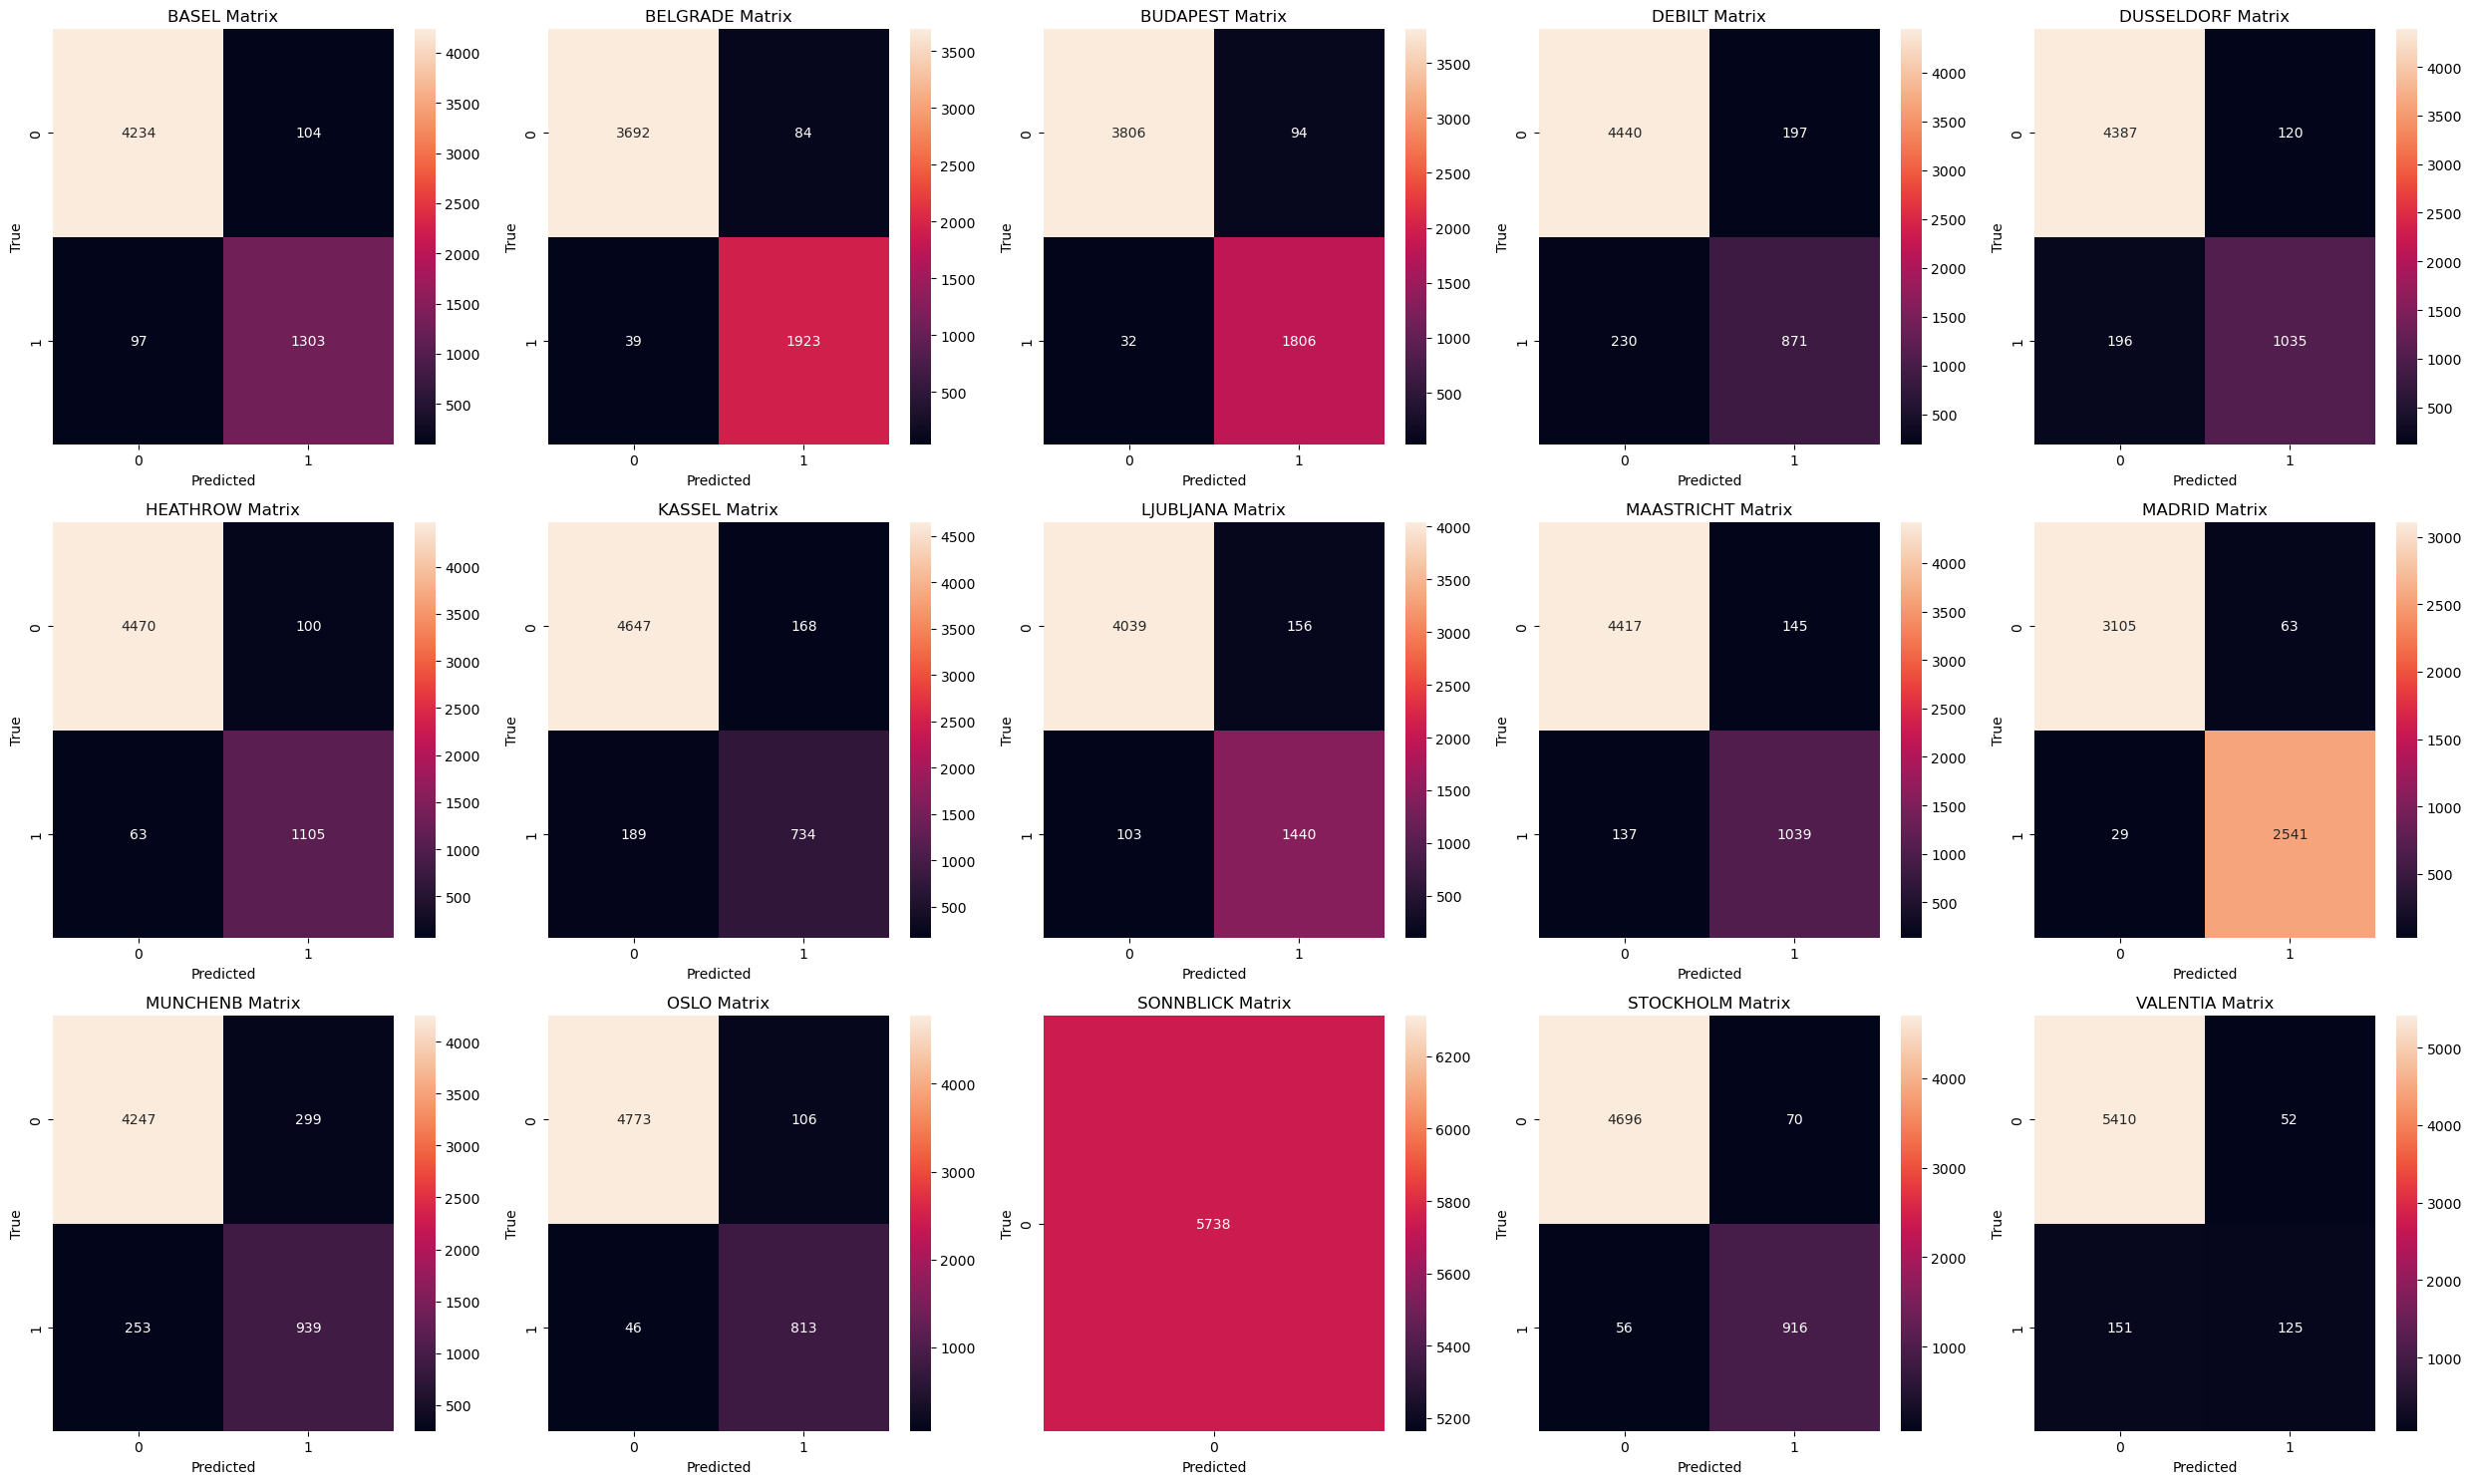

In [27]:
# Confusion matrices for the TESTING data

pleasant_suffix = "_pleasant_weather"
stations = [c.replace(pleasant_suffix, "") for c in y_test.columns]

fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.ravel()

for idx, station in enumerate(stations):
    true_labels = y_test.iloc[:, idx]
    pred_labels = best_y_pred_test[:, idx]

    cm = confusion_matrix(true_labels, pred_labels)

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt="g", ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(f"{station} Matrix")

for j in range(len(stations), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/TestingConfusionMatrix.png"
plt.savefig(save_path, dpi=300)
plt.show()


In [34]:
# Plot accuracy table

def make_accuracy_table(y_true_df, y_pred_array, pleasant_suffix="_pleasant_weather"):
    """
    y_true_df: pandas DataFrame, shape (n_samples, n_stations)
              columns like 'BASEL_pleasant_weather', etc.
    y_pred_array: numpy array, shape (n_samples, n_stations)
              predicted labels for same stations in same order
    """
    rows = []
    stations = [c.replace(pleasant_suffix, "") for c in y_true_df.columns]

    for idx, station in enumerate(stations):
        true_labels = y_true_df.iloc[:, idx]
        pred_labels = y_pred_array[:, idx]

        if len(np.unique(true_labels)) > 1 and len(np.unique(pred_labels)) > 1:
            cm = confusion_matrix(true_labels, pred_labels)

            if cm.shape == (2, 2):
                tn, fp, fn, tp = cm.ravel()
            else:
                tn = fp = fn = tp = 0
                if cm.shape == (1, 1):
                    if np.unique(true_labels)[0] == 0:
                        tn = cm[0, 0]
                    else:
                        tp = cm[0, 0]

        else:
            if np.unique(true_labels)[0] == np.unique(pred_labels)[0]:
                if np.unique(true_labels)[0] == 0:
                    tn = len(true_labels); tp = fp = fn = 0
                else:
                    tp = len(true_labels); tn = fp = fn = 0
            else:
                if np.unique(true_labels)[0] == 0:
                    fp = len(true_labels); tn = tp = fn = 0
                else:
                    fn = len(true_labels); tn = tp = fp = 0

        accuracy = (tn + tp) / (tn + fp + fn + tp) if (tn + fp + fn + tp) > 0 else 0

        rows.append({
            "Station": station,
            "Accurate 0 (TN)": tn,
            "Accurate 1 (TP)": tp,
            "False Pos (FP)": fp,
            "False Neg (FN)": fn,
            "Accuracy Rate (%)": round(accuracy * 100, 2)
        })

    return pd.DataFrame(rows)


In [36]:
ann_acc_table_s1 = make_accuracy_table(y_test, y_pred_test)
ann_acc_table_s1

,Station,Accurate 0 (TN),Accurate 1 (TP),False Pos (FP),False Neg (FN),Accuracy Rate (%)
0,BASEL,4183,1297,155,103,95.50
1,BELGRADE,3670,1866,106,96,96.48
2,BUDAPEST,3814,1701,86,137,96.11
3,DEBILT,4364,922,273,179,92.12
4,DUSSELDORF,4336,1064,171,167,94.11
5,HEATHROW,4427,1017,143,151,94.88
6,KASSEL,4699,784,116,139,95.56
7,LJUBLJANA,4023,1411,172,132,94.70
8,MAASTRICHT,4383,1019,179,157,94.14
9,MADRID,3081,2490,87,80,97.09


### Scenario 2: ANN with hidden layers (20, 10, 5), max_iter=1000, tol=0.0001

In [28]:
# Fit model
mlp_s2 = MLPClassifier(
    hidden_layer_sizes=(20, 10, 5),
    max_iter=1000,
    tol=0.0001,
    random_state=42
)
mlp_s2.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=1000, random_state=42)

In [29]:
# Predict on TEST set only
y_pred_test_s2 = mlp_s2.predict(X_test_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


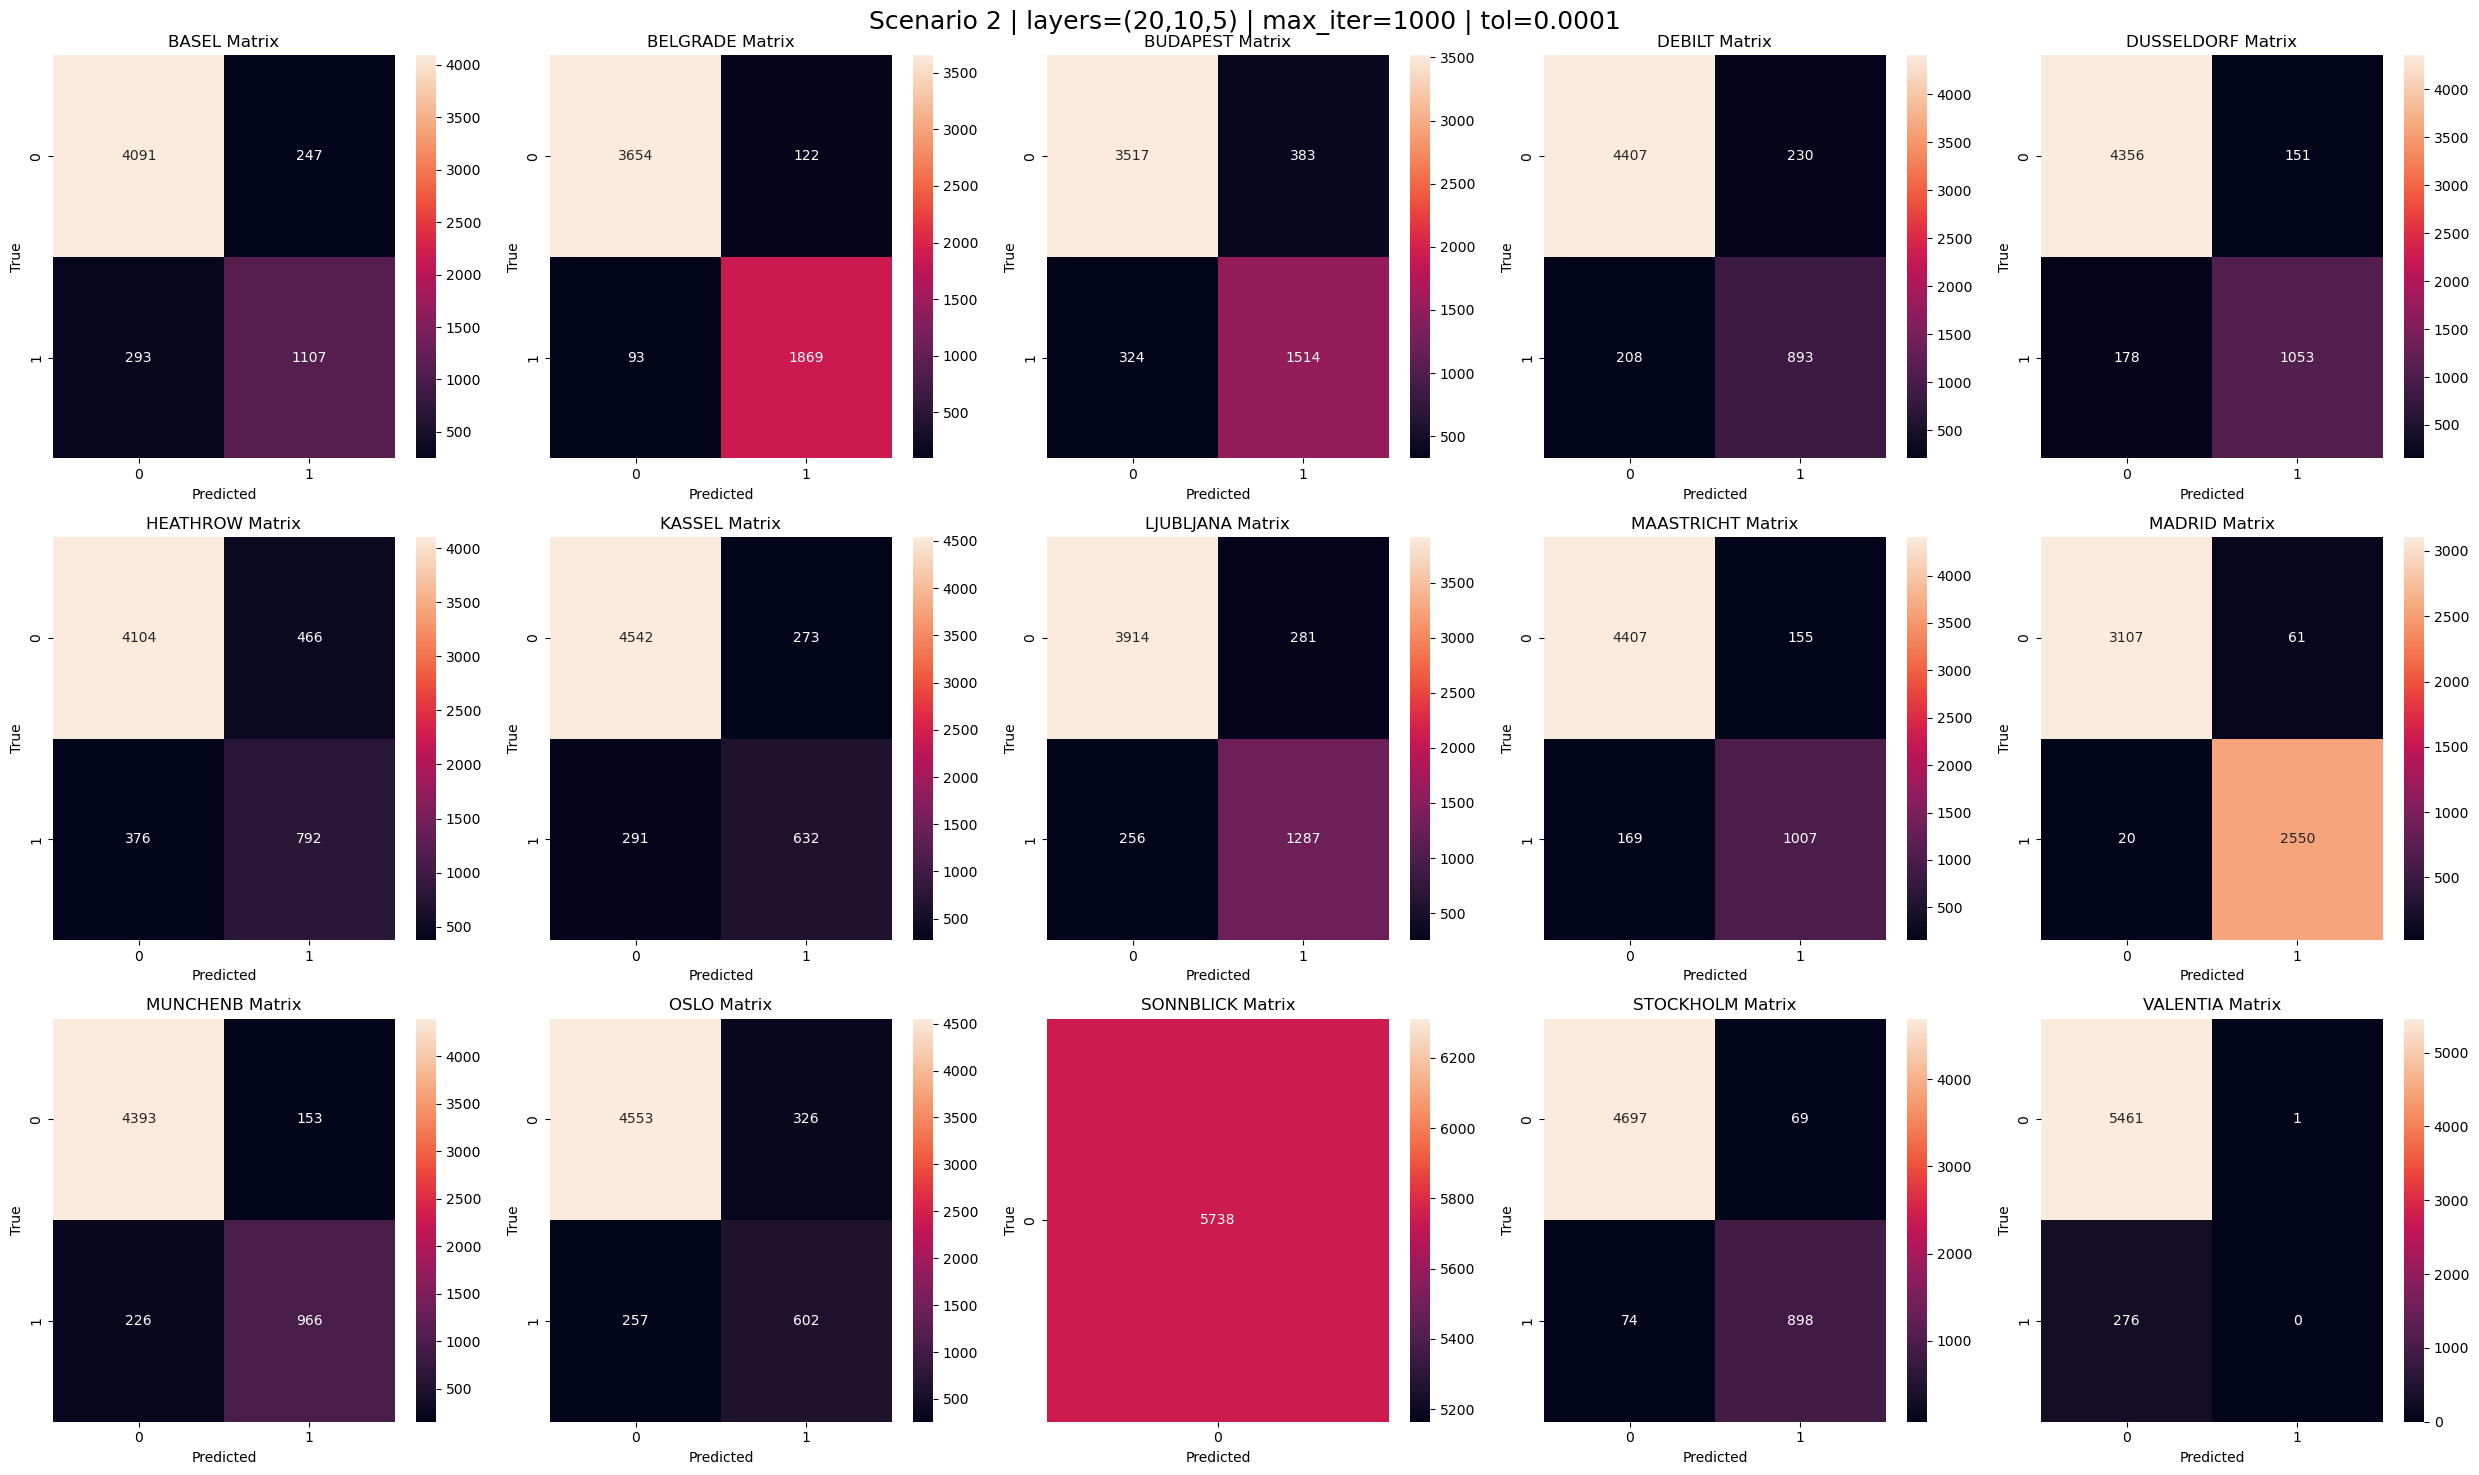

In [30]:
# Confusion Matrix of Scenario 2 TESTING data
# 3) Multi-station confusion matrices (TEST set)
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.ravel()

for idx, station in enumerate(stations):
    true_labels = y_test.iloc[:, idx]
    pred_labels = y_pred_test_s2[:, idx]
    cm = confusion_matrix(true_labels, pred_labels)

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt="g", ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(f"{station} Matrix")

# hide any unused axes
for j in range(len(stations), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Scenario 2 | layers=(20,10,5) | max_iter=1000 | tol=0.0001", fontsize=18)
plt.tight_layout()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/S2TestingConfusionMatrix.png"
plt.savefig(save_path, dpi=300)
plt.show()

In [37]:
ann_acc_table_s2 = make_accuracy_table(y_test, y_pred_test_s2)
ann_acc_table_s2

,Station,Accurate 0 (TN),Accurate 1 (TP),False Pos (FP),False Neg (FN),Accuracy Rate (%)
0,BASEL,4091,1107,247,293,90.59
1,BELGRADE,3654,1869,122,93,96.25
2,BUDAPEST,3517,1514,383,324,87.68
3,DEBILT,4407,893,230,208,92.37
4,DUSSELDORF,4356,1053,151,178,94.27
5,HEATHROW,4104,792,466,376,85.33
6,KASSEL,4542,632,273,291,90.17
7,LJUBLJANA,3914,1287,281,256,90.64
8,MAASTRICHT,4407,1007,155,169,94.35
9,MADRID,3107,2550,61,20,98.59


### Scenario 3: ANN with hidden layers (50, 20, 10), max_iter=1000, tol=0.00001

In [31]:
# Fit model
mlp_s3 = MLPClassifier(
    hidden_layer_sizes=(50, 20, 10),
    max_iter=1000,
    tol=0.00001,
    random_state=42
)
mlp_s3.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=1000, random_state=42,
              tol=1e-05)

In [32]:
# Predict on TEST set only
y_pred_test_s3 = mlp_s3.predict(X_test_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


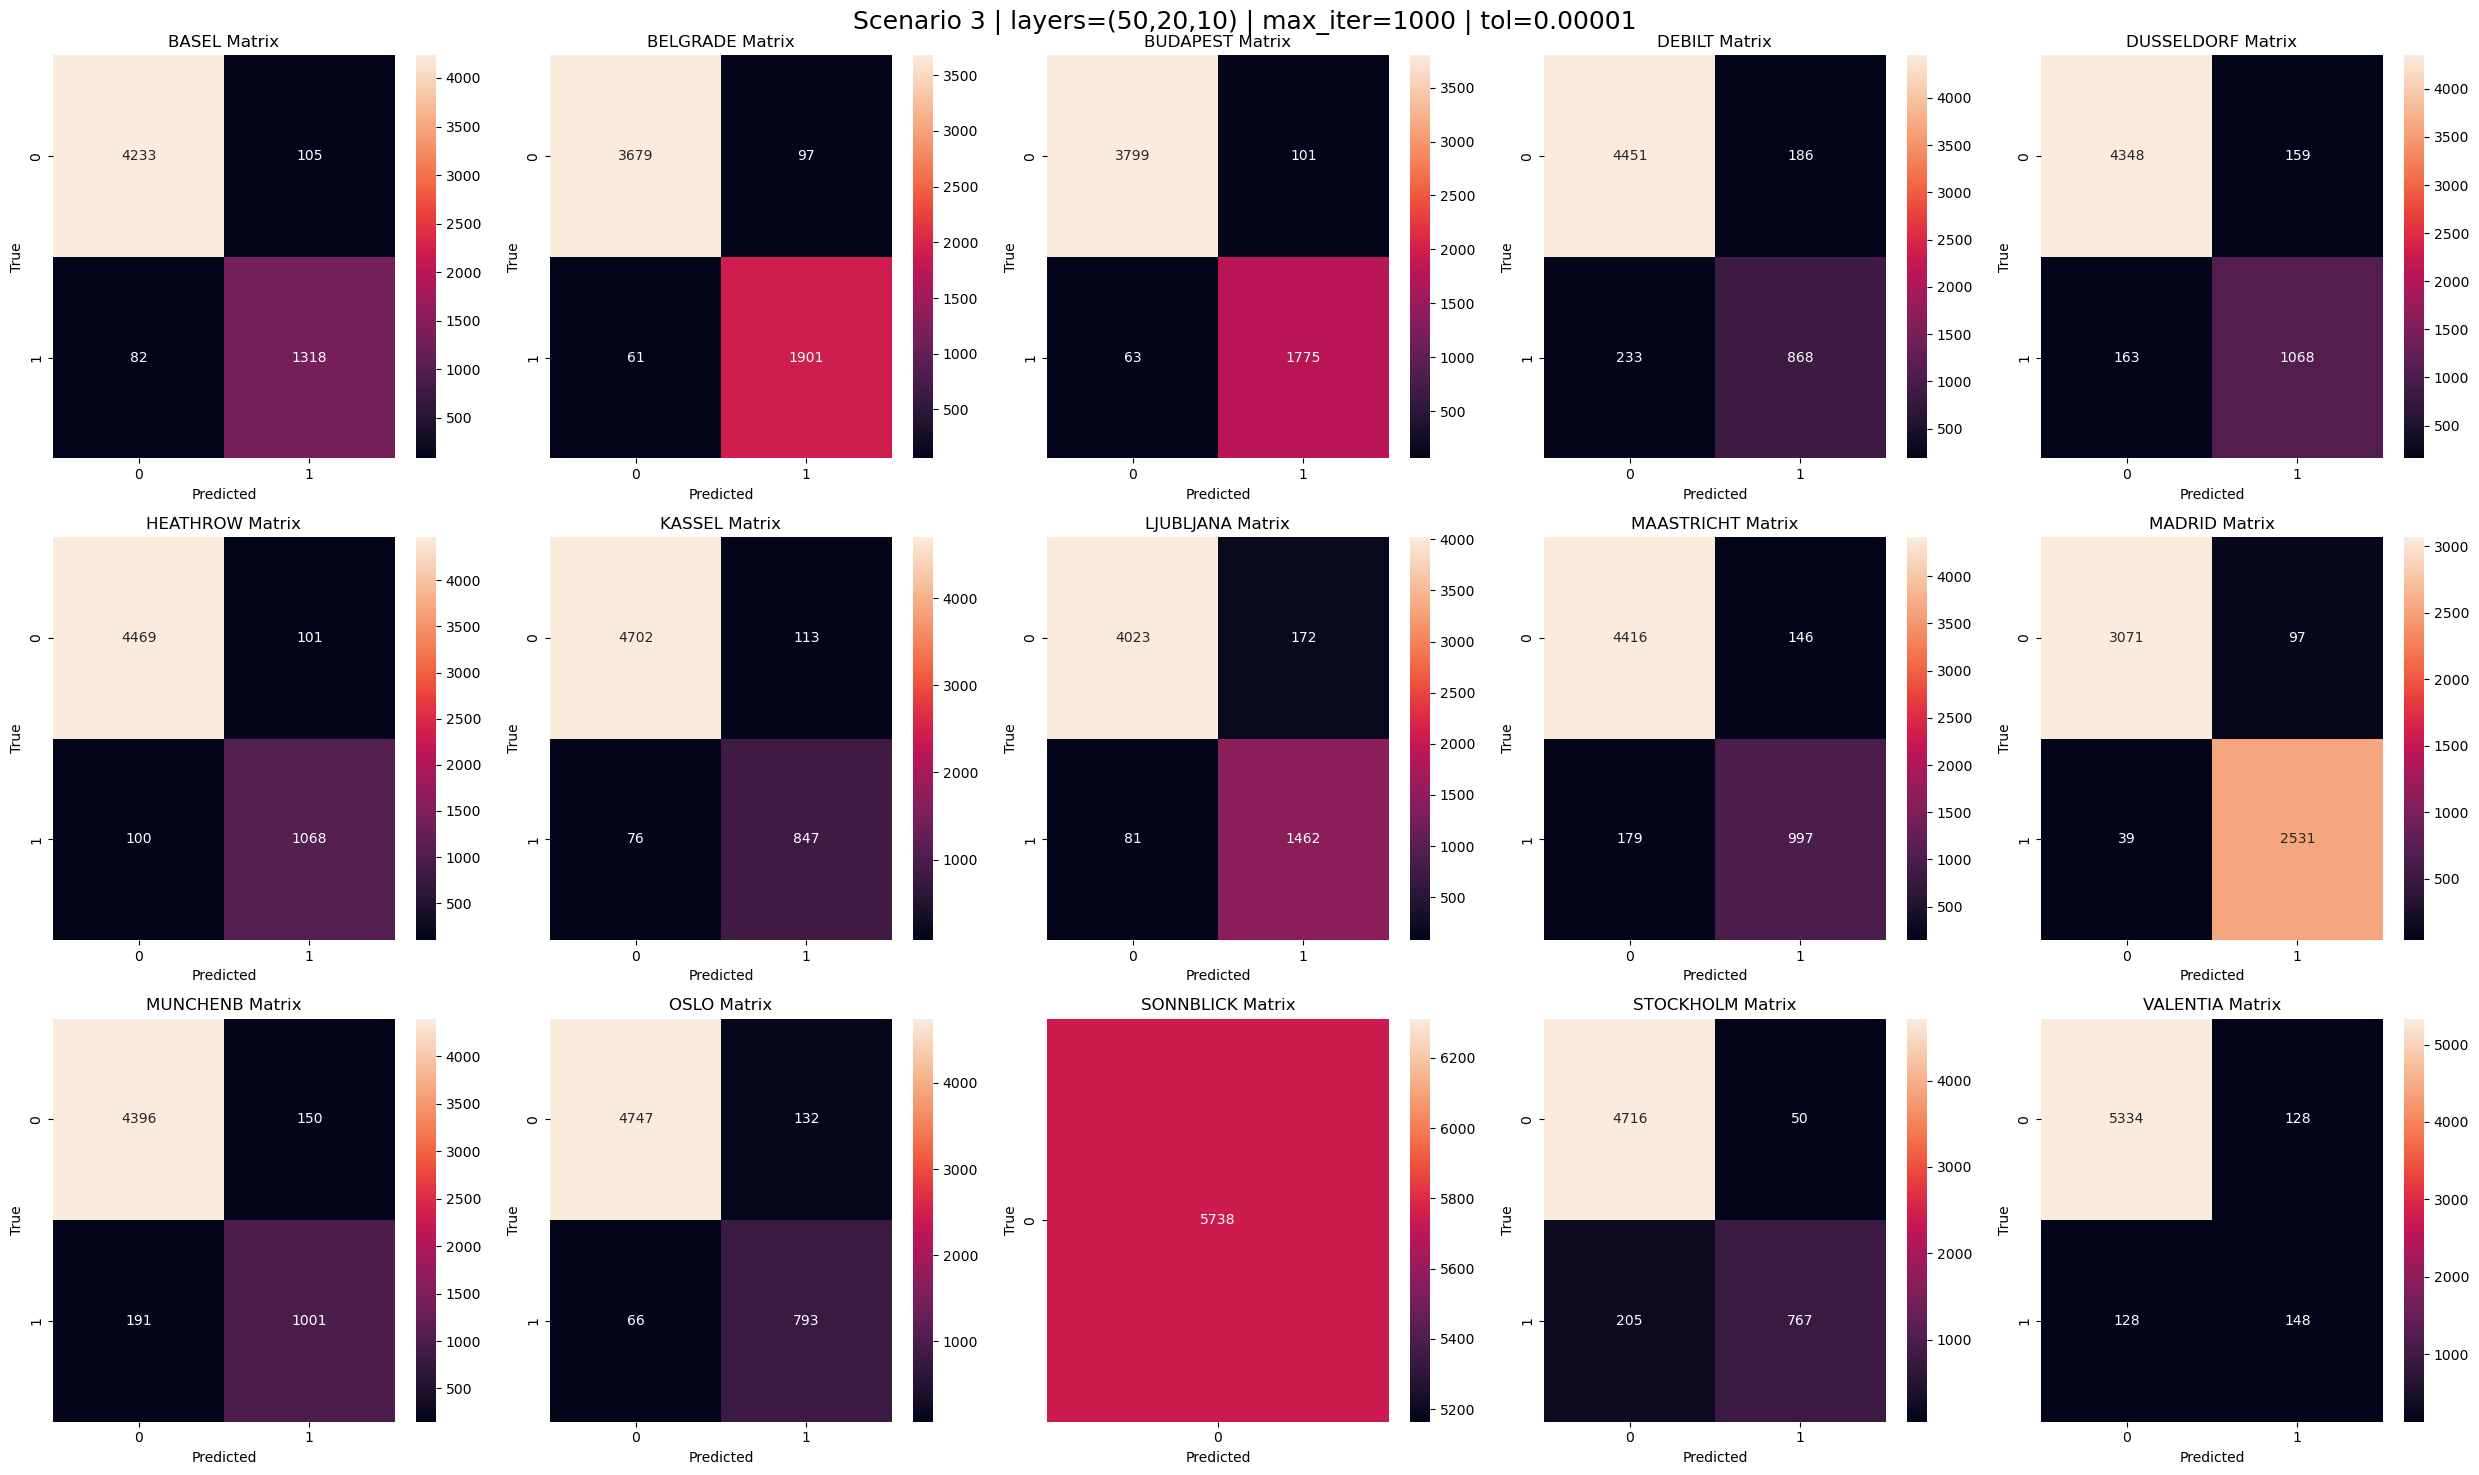

In [33]:
# Confusion matrices for Scenario 3 TESTING data
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.ravel()

for idx, station in enumerate(stations):
    true_labels = y_test.iloc[:, idx]
    pred_labels = y_pred_test_s3[:, idx]
    cm = confusion_matrix(true_labels, pred_labels)

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt="g", ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(f"{station} Matrix")

# hide any unused axes
for j in range(len(stations), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Scenario 3 | layers=(50,20,10) | max_iter=1000 | tol=0.00001", fontsize=18)
plt.tight_layout()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/S3TestingConfusionMatrix.png"
plt.savefig(save_path, dpi=300)

plt.show()

In [38]:
ann_acc_table_s3 = make_accuracy_table(y_test, y_pred_test_s3)
ann_acc_table_s3

,Station,Accurate 0 (TN),Accurate 1 (TP),False Pos (FP),False Neg (FN),Accuracy Rate (%)
0,BASEL,4233,1318,105,82,96.74
1,BELGRADE,3679,1901,97,61,97.25
2,BUDAPEST,3799,1775,101,63,97.14
3,DEBILT,4451,868,186,233,92.70
4,DUSSELDORF,4348,1068,159,163,94.39
5,HEATHROW,4469,1068,101,100,96.50
6,KASSEL,4702,847,113,76,96.71
7,LJUBLJANA,4023,1462,172,81,95.59
8,MAASTRICHT,4416,997,146,179,94.34
9,MADRID,3071,2531,97,39,97.63


### For scenario comparison, I plotted confusion matrices for the TESTING dataset only, since these reflect real generalization performance; training-set matrices tend to be overly optimistic and are less informative for model selection.